El objetivo de este documento es explorar alternativas ofrecidas por la el modulo scipy.interpolate para interpolar datos 2d correspondientes a curvas de $C_L~vs.~\alpha$, $C_M~vs.~\alpha$ y $C_D~vs.~C_L$ para distintos reynolds. Los datos son estan extraidos del Report NACA 824 Gregory P.D. Siemens en 1994 cuando estaba en la Universidad de Saskatchewan.

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from scipy import interpolate
import numpy as np
import profile_characteristics
%matplotlib inline

Creamos un objeto perfil usando el modulo profile_characteristics, que requiere como inicialización el nombre de archivo con los datos antes mencionados. En este caso analizamos el perfil NACA 0009

In [3]:
name = 'TR824-Digitized/0009.txt'
airfoil = profile_characteristics.Airfoil(name)

In [4]:
aoa_l = [[aoa for aoa,cl in airfoil.AIRFOIL_DATA["Re{}".format(re)]["AoA_Cl"]] for re in [3,6,9]]
cl_l = [[cl for aoa,cl in airfoil.AIRFOIL_DATA["Re{}".format(re)]["AoA_Cl"]] for re in [3,6,9]]
re_l = [[re for i in range(len(aoa))] for aoa,re in zip(aoa_l,[3e6,6e6,9e6])]
aoa_points = aoa_l[0]+aoa_l[1]+aoa_l[2]
cl_points = cl_l[0]+cl_l[1]+cl_l[2]
re_points = re_l[0]+re_l[1]+re_l[2]

In [5]:
grid_aoa, grid_re = np.mgrid[-20:25.5:0.5,1.5e6:10.5e6:0.5e6]

Como primer función de interpolación usamos la función bisplrep, que es la base de las otras funciones de interpolación 2d, y que usa como base la libreria FORTRAN fitpack. Usamos el comando plot_surface de pyplot, indicandole a los ejes que son 3d (para esto hace falta tener el paquete Axes3D de mpl_toolkits.mplot3d). La desventaja que tiene esta función es que hace falta usar la función bisplev para evaluarla.

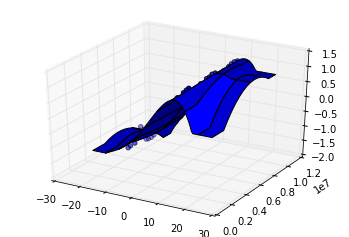

In [39]:
bisplrep = interpolate.bisplrep(aoa_points, re_points, cl_points, s=0.5, kx=4, ky=2)
grid_cl = np.array([[interpolate.bisplev(aoa,re, bisplrep) for aoa,re in zip(aoa_line,re_line)] for aoa_line,re_line in zip(grid_aoa, grid_re)])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(grid_aoa, grid_re,grid_cl)
ax.scatter(aoa_points, re_points, zs=cl_points, zdir='z')
plt.show()

Como segunda opción usamos interp2d, que es un rapper de bisplrep, y devuelve una función lista para usar. La desventaja es que es menos configurable, por lo que hay menos parametros con los que jugar para obtener el resultado deseado, y evitar mensajes de advertencia como el siguiente.

In [26]:
interp2d = interpolate.interp2d(aoa_points, re_points, cl_points, kind='cubic')
grid_cl = np.array([[float(interp2d(aoa,re)) for aoa,re in zip(aoa_line,re_line)] for aoa_line,re_line in zip(grid_aoa, grid_re)])

c:\users\enri\appdata\local\programs\python\python35-32\lib\site-packages\scipy\interpolate\fitpack.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=14,11 m=69 fp=0.013198 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


c:\users\enri\appdata\local\programs\python\python35-32\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


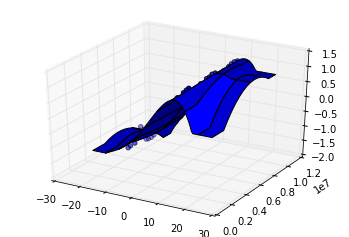

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(grid_aoa, grid_re, grid_cl)
ax.scatter(aoa_points, re_points, zs=cl_points, zdir='z')
fig.show()

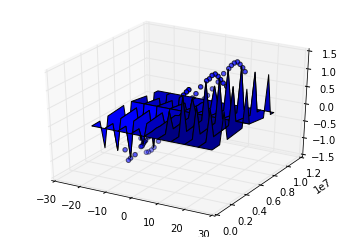

In [60]:
rbf = interpolate.Rbf(aoa_points, re_points, cl_points, epsilon=2, function='linear', smooth=1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(grid_aoa, grid_re, rbf(grid_aoa, grid_re))
ax.scatter(aoa_points, re_points, zs=cl_points, zdir='z')
plt.show()